In [92]:
# Import necessary modules and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from math import sqrt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline

In [93]:
# 1. Load Data

# Read the “housing.csv” file from the folder into the program.
data = pd.read_csv('data/housing.csv')

# Print first few rows of this data.
data.head()

#Extract input (X) and output (Y) data from the dataset.
x = data.median_income
y = data.median_house_value

In [94]:
# 2. Handle missing values
#Fill the missing values with the mean of the respective column.
data.isnull().sum()
data["total_bedrooms"] = data["total_bedrooms"].fillna(data["total_bedrooms"].mean())
data.isnull().sum()



longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [95]:
# 3. Encode categorical data
# Convert categorical column in the dataset to numerical data.

le = LabelEncoder()
data["ocean_proximity"] = le.fit_transform(data["ocean_proximity"])


In [96]:
# 4. Split the dataset
# Split the data into 80% training dataset and 20% test dataset.
feature_cols = ['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','ocean_proximity']
mean = np.mean(data, axis=0)
std = np.std(data, axis=0)
data = (data - mean)/std
X = data[feature_cols]
y = data.median_house_value
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [97]:
# 6. Perform Linear Regression
# Perform Linear Regression on training data.
lm = LinearRegression()
lm.fit(X_train, y_train)
pred = lm.predict(X_test)

# Print root mean squared error (RMSE) from Linear Regression.
rmse = sqrt(mean_squared_error(y_test, pred))
print(rmse)


0.6051233507039978


In [98]:
#7. Perform Decision Tree Regression
classifier = DecisionTreeRegressor()
classifier.fit(X_train,y_train)

#Predict output for test dataset using the fitted model
y_predict = classifier.predict(X_test)

#Print root mean squared error from Decision Tree Regression.
rmse = sqrt(mean_squared_error(y_test, y_predict))
print(rmse)


0.5844587494460095


In [99]:
#8. Perform Random Forest Regression
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)

# Predict output for test dataset using the fitted model.
rfr_y_pred = rfr.predict(X_test)
#Print root mean squared error from Random Forest Regression.
rmse = sqrt(mean_squared_error(y_test, y_predict))
print(rmse)


0.5844587494460095


[ 0.10376741  0.69669839  0.17548882 ... -0.24194509  0.82928647
 -0.19462863]


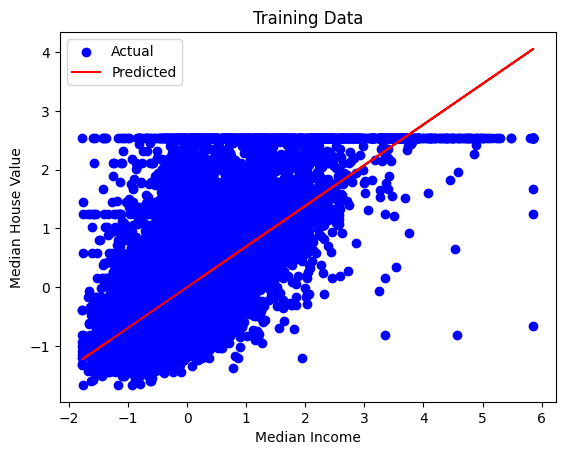

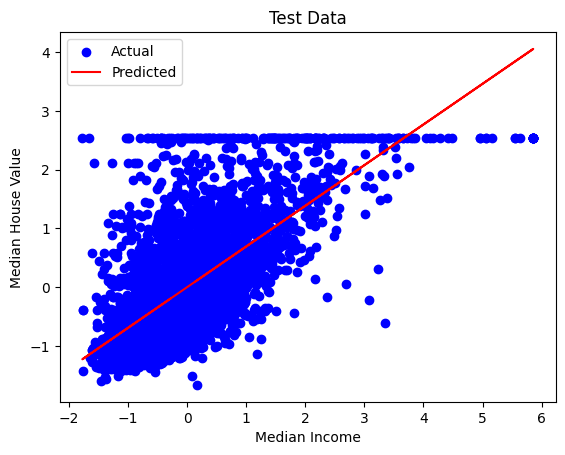

In [100]:
#9. Perform Linear Regression with one independent variable

#Extract just the median_income column from the independent variables (from X_train and X_test).
lin_reg = LinearRegression()
X_train =X_train['median_income'].to_numpy().reshape(-1,1)
X_test =X_test['median_income'].to_numpy().reshape(-1,1)

lin_reg.fit(X_train,y_train)

#Predict output for test dataset using the fitted model
pred_out = lin_reg.predict(X_test)
print(pred_out)

#Plot the fitted model for training data as well as for test data to check if the fitted model satisfies the test data.


y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)

# Plotting the actual vs predicted values for the training data
plt.scatter(X_train, y_train, color='blue', label='Actual')
plt.plot(X_train, y_train_pred, color='red', label='Predicted')
plt.title('Training Data')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.legend()
plt.show()


# Plotting the actual vs predicted values for the test data
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_test_pred, color='red', label='Predicted')
plt.title('Test Data')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.legend()
plt.show()